<a href="https://colab.research.google.com/github/jchamilton75/UniversiteOuverte/blob/main/Equations_de_Friedman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Résolution numérique des équations de Friedman
## J.-Ch. Hamilton - Mars 2024

Les équations de Friedman s'écrivent:
$$
\left\{
\begin{array}{lll}
\left(\frac{\dot{a}}{a}\right)^2 &=& \frac{8\pi G\rho}{3}+\frac{\Lambda c^2}{3}-\frac{k c^2}{a^2} \\
\frac{\ddot{a}}{a} &=& -\frac{4\pi G}{3}\left(\rho + \frac{3p}{c^2}\right) +\frac{\Lambda c^2}{3}
\end{array}\right.
$$

On peut introduire un facteur d'échelle relatif:
$$y(t) = \frac{a(t)}{a(t=t_0)}$$
ainsi que la densité critique:
$$\rho_{c,0} = \frac{3H_0^2}{8\pi G}$$
Et enfin, on a les définitions habtuelles pour les densités de matière non-relativiste, relativiste (rayonnement), courbure et constante cosmologique:
$$\begin{eqnarray}
\Omega_{m,0} &=& \frac{\rho_{m,0}}{\rho_{c,0}} &\Longrightarrow& \Omega_{m}(t) &=& \Omega_{m,0} \times\left(\frac{a_0}{a}\right)^3 ~~~~~~ \text{which has zero pressure}\\
\Omega_{r,0} &=& \frac{\rho_{r,0}}{\rho_{c,0}}  &\Longrightarrow& \Omega_{r}(t) &=& \Omega_{r,0} \times\left(\frac{a_0}{a}\right)^4~~~~~~ \text{which has pressure} p=\frac{\rho c^2 }{3} \\
\Omega_{\Lambda,0} &=& \frac{\Lambda c^2}{3H_0^2} &\Longrightarrow& \Omega_{\Lambda}(t) &=& \Omega_{\Lambda,0} \\
\Omega_{k,0} &=& -\frac{kc^2}{a_0^2 H_0^2}
\end{eqnarray}$$

La seconde équation de Friedman peut être ré-écrite de manière à isoler la dérivée seconde:
$$\begin{eqnarray}
&&\frac{\ddot{a}}{a} &=& -\frac{4\pi G}{3}\left(\rho + \frac{3p}{c^2}\right) +\frac{\Lambda c^2}{3} \\
\text{We have:} &&&& \\
&-&\text{Matter:} \frac{-4\pi G}{3}\left( \rho+\frac{3p}{c^2}\right) &=& -\frac{H_0^2}{2}\Omega_m = -\frac{H_0^2}{2}\Omega_m^0\times\frac{1}{y^3}\\
&-&\text{Radiation:} \frac{-4\pi G}{3}\left( \rho+\frac{3p}{c^2}\right) &=& \frac{-8\pi G}{3}\rho_r= -H_0^2\Omega_r = -H_0^2\Omega_m^0\times\frac{1}{y^4}\\
&-&\Lambda: \frac{\Lambda c^2}{3} &=& H_0^2\Omega_\Lambda^0\\
\text{Therefore:} && \frac{y"}{y} &=& - \frac{H_0^2}{2}\left(\frac{\Omega_{m,0}}{y^3} + \frac{2\Omega_{r,0}}{y^4}-2\Omega_{\Lambda,0}\right) \\
&\Longleftrightarrow & y" &=& - y \frac{H_0^2}{2}\left(\frac{\Omega_{m,0}}{y^3} + \frac{2\Omega_{r,0}}{y^4}-2\Omega_{\Lambda,0}\right)
\end{eqnarray}$$


Dans la première équation de Fridman, nous allons isoler un des termes en $y$ de manière à l'injecter dans la seconde équation:
$$\begin{eqnarray}
&&\left(\frac{\dot{a}}{a}\right)^2 &=& \frac{8\pi G\rho}{3}+\frac{\Lambda c^2}{3}-\frac{k c^2}{a^2} \\
&\Longleftrightarrow & \left(\frac{y'}{y}\right)^2 &=& H_0^2 \left(\frac{\Omega_{m,0}}{y^3} +\frac{\Omega_{r,0}}{y^4} +\Omega_{\Lambda,0} +\frac{\Omega_k^0}{y^2}\right) \\
&\Longleftrightarrow & \frac{y'^2}{H_0^2} - \frac{\Omega_{r,0}}{y^2} -\Omega_{\Lambda,0}y^2 - \Omega_{k,0} &=& \frac{\Omega_{m,0}}{y} \\
&\Longleftrightarrow & y &=& \Omega_{m,0} \left( \frac{y'^2}{H_0^2} - \frac{\Omega_{r,0}}{y^2} - y^2\Omega_{\Lambda,0} -\Omega_{k,0}
  \right)
\end{eqnarray}$$

On injecte donc la nouvelle forme de la première équation dans la nouvelle forme de la seconde:
$$ y" = - \frac{H_0^2}{2}\left(\frac{\Omega_{m,0}}{y^3} + \frac{2\Omega_{r,0}}{y^4}-2\Omega_{\Lambda,0}\right)\Omega_{m,0} \left( \frac{y'^2}{H_0^2} - \frac{\Omega_{r,0}}{y^2} - y^2\Omega_{\Lambda,0} -\Omega_{k,0}
  \right)^{-1}
$$

On peut alors considérer cette équation différentielle de second ordre comme un système de deux équations du premier ordre:
$$
\left\{
\begin{array}{lll}
z &=& \frac{dy}{dt} \\
\frac{dz}{dt} &=& f\left(y, \frac{dy}{dt}\right)
\end{array}
\right.
$$
Ou $f$ est l'expression trouvée ci-dessus pour $y''$.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from pylab import *




def solve_friedman(tmin, tmax, H0, omega_m, omega_r, omega_l, npts=1000):
  print(H0, omega_m, omega_r, omega_l)
  mpc = 3.09e22 #Megaparsec in meters
  Gyr = 3600*24*365*10**9 #Gyr in sec
  h0 = H0*1000/mpc*Gyr
  U_0 = [1, h0]

  omega_k = 1. - omega_m - omega_r - omega_l

  def dydt(t, U):
    y, y1 = U
    dydt_ = [y1,
            -(h0**2/2)*(omega_m/y**3 +
                        2*omega_r/y**4 -
                        2*omega_l) *
            omega_m*(y1**2/(h0**(2)) -
                      omega_r/y**2 -
                      omega_l*y**2 -
                      omega_k)**(-1)]
    return dydt_

  method = 'Radau'
  # On résoud vers les temps positifs et vers les temps négatifs séparément
  result_up = solve_ivp(dydt, (0, tmax), U_0, t_eval=np.linspace(0, tmax, npts), method=method, rtol=1e-5)
  result_lo = solve_ivp(dydt, (0, tmin), U_0, t_eval=np.linspace(0, tmin, npts), method=method, rtol=1e-5)

  myt = np.append(result_lo.t[::-1], result_up.t)
  mya =  np.append(result_lo.y[0,::-1], result_up.y[0,:])

  return myt, mya

70.0 4.9999 0.0001 0.0
70.0 0.2999 0.0001 0.0
70.0 0.9999 0.0001 0.0
70.0 0.2999 0.0001 0.7


Text(0.5, 1.0, 'Evolution of the scale factor of the Universe')

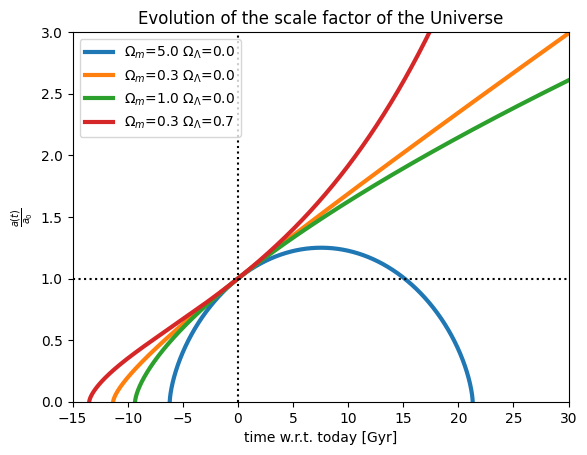

In [ ]:
H0 = 70.
allor = np.array([0.,  0.,  0., 0.])+1e-4
allom = np.array([5.,  0.3, 1., 0.3])-allor
allol = np.array([0.,  0.,  0., 0.7])
tmin = -15
tmax = 30

results = []
for i in range(len(allom)):
  myt, mya = solve_friedman(tmin, tmax, H0, allom[i], allor[i], allol[i], npts=10000)
  results.append([myt, mya])



for i in range(len(allom)):
  plot(results[i][0], results[i][1], lw=3,
       label = '$\Omega_m$={0:3.1f} $\Omega_\Lambda$={1:3.1f}'.format(allom[i], allol[i]))
axvline(x=0, ls=':', color='k')
axhline(y=1, ls=':', color='k')
xlim(tmin,tmax)
ylim(0, 3)
xlabel('time w.r.t. today [Gyr]')
ylabel(r'$\frac{a(t)}{a_0}$')
legend(loc='upper left')
title('Evolution of the scale factor of the Universe')
